In [5]:
%reset -f
import sys
print(sys.version)


3.10.12 (main, Jul  5 2023, 18:54:27) [GCC 11.2.0]


In [6]:
%reset -f

# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
##read excel
import pandas as pd
data_path = "./dataset/INVENTORY_LARGE.xlsx"
df= pd.read_excel(data_path, engine='openpyxl')

df

,DATE,A,B,C,D,E,F,G,VALUE
0,2023-07-03,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
1,2023-07-04,0.00,-5.00,0.0,0.00,0.00,0.00,0.0,-5.00
2,2023-07-05,0.00,-5.80,0.0,0.00,0.00,0.00,1.0,-4.80
3,2023-07-06,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
4,2023-07-07,0.00,9.75,0.0,9.70,0.00,0.00,0.0,19.45
...,...,...,...,...,...,...,...,...,...
350,2024-11-07,0.00,0.00,-6.9,0.00,-12.40,-12.85,0.0,-32.15
351,2024-11-08,8.15,0.00,0.0,-24.35,5.15,0.00,0.0,-11.05
352,2024-11-11,0.00,0.00,0.0,0.00,0.00,0.00,31.0,31.00
353,2024-11-12,0.00,0.00,18.2,0.00,-12.60,8.00,0.0,13.60


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    355 non-null    datetime64[ns]
 1   A       355 non-null    float64       
 2   B       355 non-null    float64       
 3   C       355 non-null    float64       
 4   D       355 non-null    float64       
 5   E       355 non-null    float64       
 6   F       355 non-null    float64       
 7   G       355 non-null    float64       
 8   VALUE   355 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 25.1 KB


In [9]:
# add related columns

df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day_of_Month'] = df['DATE'].dt.day
df['Day_of_Week'] = df['DATE'].dt.dayofweek
df['Day_of_Year'] = df['DATE'].dt.dayofyear
df['VALUE_is_Positive'] = df['VALUE'].apply(lambda x: 1 if x > 0 else 0)

SEQ_LEN = 0
for i in range(1, SEQ_LEN + 1):
    df[f'Value_is_Positive_Lag_{i}'] = df['Value_is_Positive'].shift(i)

df.dropna(inplace=True)

df

,DATE,A,B,C,D,E,F,G,VALUE,Year,Month,Day_of_Month,Day_of_Week,Day_of_Year,VALUE_is_Positive
0,2023-07-03,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2023,7,3,0,184,0
1,2023-07-04,0.00,-5.00,0.0,0.00,0.00,0.00,0.0,-5.00,2023,7,4,1,185,0
2,2023-07-05,0.00,-5.80,0.0,0.00,0.00,0.00,1.0,-4.80,2023,7,5,2,186,0
3,2023-07-06,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,2023,7,6,3,187,0
4,2023-07-07,0.00,9.75,0.0,9.70,0.00,0.00,0.0,19.45,2023,7,7,4,188,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2024-11-07,0.00,0.00,-6.9,0.00,-12.40,-12.85,0.0,-32.15,2024,11,7,3,312,0
351,2024-11-08,8.15,0.00,0.0,-24.35,5.15,0.00,0.0,-11.05,2024,11,8,4,313,0
352,2024-11-11,0.00,0.00,0.0,0.00,0.00,0.00,31.0,31.00,2024,11,11,0,316,1
353,2024-11-12,0.00,0.00,18.2,0.00,-12.60,8.00,0.0,13.60,2024,11,12,1,317,1


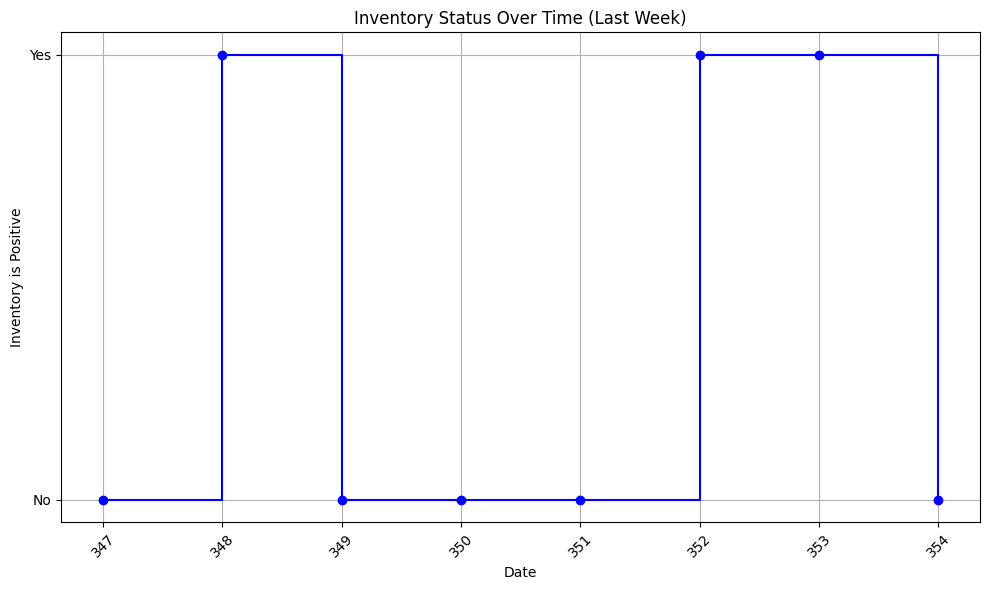

In [10]:
#plot data for last 10 days

import matplotlib.pyplot as plt

# Filter for the last week
plot_data = df[df['DATE'] >= (df['DATE'].max() - pd.Timedelta(days=10))]

# Plot
plt.figure(figsize=(10, 6))
plt.step(plot_data.index, plot_data['VALUE_is_Positive'], where='post', marker='o', linestyle='-', color='b')
plt.title('Inventory Status Over Time (Last Week)')
plt.xlabel('Date')
plt.ylabel('Inventory is Positive')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['DATE', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'VALUE', 'Year', 'Month',
       'Day_of_Month', 'Day_of_Week', 'Day_of_Year', 'VALUE_is_Positive'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

prev_col = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'VALUE']
# Drop the 'Date' column
df_preprocessed = df.drop(columns=['DATE'])
for col in prev_col:
  df_preprocessed[col] = df_preprocessed[col].shift(1)


df_preprocessed.dropna(inplace=True)

# Convert categorical variables to numerical

# Separate features and target
X = df_preprocessed.drop(columns=['VALUE_is_Positive', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'VALUE' ]).values
y = df_preprocessed['VALUE_is_Positive'].values

print("X shape:", X.shape)
print("y shape:", y.shape)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=False)

#


X shape: (354, 5)
y shape: (354,)


In [13]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier

# Build and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_pred > 0).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error: {mse}')


Accuracy: 0.5833333333333334
Mean Squared Error: 0.4166666666666667


In [20]:

day_count = 7
predictions = y_pred.flatten()
real = []
pr = []
k = 0
for i in range(len(y_test)):
    if i != 0 and i % day_count == 0:
        real.append(y_test[k:i].sum())
        pr.append(predictions[k:i].sum())
        k = i
real.append(y_test[k:].sum())
pr.append(predictions[k:].sum())


count = 0
for a,b in zip(real,pr):
  print(a,b)
  if abs(a-b) <= 1:
    count += 1
print("acc on days = ", count/len(real))



4 4
5 2
4 4
3 2
3 3
0 1
acc on days =  0.8333333333333334


In [15]:
# Create a DataFrame for plotting

last_plot = 10
plot_data = pd.DataFrame({
    'Actual': y_test[-last_plot:].values,
    'Predicted': y_pred.flatten()[-last_plot:]
})

# plot_data.reset_index(drop=True, inplace=True)
# Plot the actual values
plt.figure(figsize=(10, 6))
plt.step(plot_data.index, plot_data['Actual'], where='post', marker='o', linestyle='-', color='b', label='Actual')
plt.title('Actual Inventory_is_Positive')
plt.xlabel('Sample Index')
plt.ylabel('Inventory is Positive')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot the predicted values
plt.figure(figsize=(10, 6))
plt.step(plot_data.index, plot_data['Predicted'], where='post', marker='x', linestyle='--', color='r', label='Predicted')
plt.title('Predicted Inventory_is_Positive')
plt.xlabel('Sample Index')
plt.ylabel('Inventory is Positive')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'